# Downloading Necessary Libraries

In [0]:
!pip install keras

In [0]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.0)


In [0]:
!pip install keras

In [0]:
!pip install tensorflow

In [1]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /content/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

# This cell of code is used to mount my google drive into the collaborators

In [4]:
#this cell of code is used to mount my google drive into the collaborators

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


# This is continuation of the previous step

In [0]:
#this is continuation of the previous step
!mkdir -p drive
!google-drive-ocamlfuse drive

# From here actual code begins

In [0]:
### From here actual code begins

import numpy as np
import os
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.callbacks import ModelCheckpoint

In [0]:
dataset = np.load("drive/Datasets/datafile_vgg.npz")

In [0]:
X_train = dataset['X_train']
y_train = dataset['y_train']
X_test = dataset['X_test']
y_test = dataset['y_test']

# **Deleting the variable to free up memory**

In [0]:
del(dataset)

# Defining the model VGG19 and Freezing the model till last layer

In [25]:
#definig the model
num_classes = 10
image_input = Input(shape=(224, 224, 3))

model = VGG19(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

# freeze all the layers except the dense layers
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
del(model)
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



In [12]:
weightFile = "best.hdf5"
check  = ModelCheckpoint(weightFile, monitor = 'val_acc', verbose=1, save_best_only=True, mode= max )
checkpoints = [check]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:408: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [13]:
from keras import backend as K
K.set_value(custom_vgg_model.optimizer.lr, 1e-4)
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=35, verbose=1,callbacks = checkpoints, validation_data=(X_test, y_test))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)


Train on 7500 samples, validate on 2500 samples
Epoch 1/35
7500/7500 [==============================] - 114s 15ms/step - loss: 1.3187 - acc: 0.5581 - val_loss: 0.8461 - val_acc: 0.7192

Epoch 00001: val_acc improved from -inf to 0.71920, saving model to best.hdf5
Epoch 2/35
5920/7500 [======================>.......] - ETA: 17s - loss: 0.7737 - acc: 0.7473

7500/7500 [==============================] - 108s 14ms/step - loss: 0.7570 - acc: 0.7520 - val_loss: 0.7395 - val_acc: 0.7592

Epoch 00002: val_acc improved from 0.71920 to 0.75920, saving model to best.hdf5
Epoch 3/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.6534 - acc: 0.7895 - val_loss: 0.6927 - val_acc: 0.7720

Epoch 00003: val_acc improved from 0.75920 to 0.77200, saving model to best.hdf5
Epoch 4/35
1440/7500 [====>.........................] - ETA: 1:05 - loss: 0.5834 - acc: 0.8194

7500/7500 [==============================] - 108s 14ms/step - loss: 0.5920 - acc: 0.8092 - val_loss: 0.6770 - val_acc: 0.7924

Epoch 00004: val_acc improved from 0.77200 to 0.79240, saving model to best.hdf5
Epoch 5/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.5489 - acc: 0.8204 - val_loss: 0.6493 - val_acc: 0.7992

Epoch 00005: val_acc improved from 0.79240 to 0.79920, saving model to best.hdf5
Epoch 6/35
 736/7500 [=>............................] - ETA: 1:14 - loss: 0.4822 - acc: 0.8397

7500/7500 [==============================] - 109s 14ms/step - loss: 0.5120 - acc: 0.8363 - val_loss: 0.6463 - val_acc: 0.7956

Epoch 00006: val_acc did not improve from 0.79920
Epoch 7/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.4795 - acc: 0.8452 - val_loss: 0.6331 - val_acc: 0.7972

Epoch 00007: val_acc did not improve from 0.79920
Epoch 8/35
1280/7500 [====>.........................] - ETA: 1:07 - loss: 0.4616 - acc: 0.8352

7500/7500 [==============================] - 109s 14ms/step - loss: 0.4520 - acc: 0.8557 - val_loss: 0.6313 - val_acc: 0.8068

Epoch 00008: val_acc improved from 0.79920 to 0.80680, saving model to best.hdf5
Epoch 9/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.4295 - acc: 0.8639 - val_loss: 0.6287 - val_acc: 0.8032

Epoch 00009: val_acc did not improve from 0.80680
Epoch 10/35
 768/7500 [==>...........................] - ETA: 1:13 - loss: 0.3345 - acc: 0.9062

7500/7500 [==============================] - 109s 15ms/step - loss: 0.4075 - acc: 0.8749 - val_loss: 0.6243 - val_acc: 0.8016

Epoch 00010: val_acc did not improve from 0.80680
Epoch 11/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.3858 - acc: 0.8801 - val_loss: 0.6352 - val_acc: 0.8016

Epoch 00011: val_acc did not improve from 0.80680
Epoch 12/35
1248/7500 [===>..........................] - ETA: 1:07 - loss: 0.3829 - acc: 0.8726

7500/7500 [==============================] - 109s 14ms/step - loss: 0.3666 - acc: 0.8859 - val_loss: 0.6179 - val_acc: 0.8080

Epoch 00012: val_acc improved from 0.80680 to 0.80800, saving model to best.hdf5
Epoch 13/35
7500/7500 [==============================] - 109s 14ms/step - loss: 0.3504 - acc: 0.8933 - val_loss: 0.6207 - val_acc: 0.8096

Epoch 00013: val_acc improved from 0.80800 to 0.80960, saving model to best.hdf5
Epoch 14/35
 672/7500 [=>............................] - ETA: 1:15 - loss: 0.3232 - acc: 0.9033

7500/7500 [==============================] - 109s 15ms/step - loss: 0.3340 - acc: 0.8984 - val_loss: 0.6234 - val_acc: 0.8084

Epoch 00014: val_acc did not improve from 0.80960
Epoch 15/35
7500/7500 [==============================] - 109s 14ms/step - loss: 0.3184 - acc: 0.9029 - val_loss: 0.6243 - val_acc: 0.8128

Epoch 00015: val_acc improved from 0.80960 to 0.81280, saving model to best.hdf5
Epoch 16/35
1120/7500 [===>..........................] - ETA: 1:09 - loss: 0.3008 - acc: 0.9098

7500/7500 [==============================] - 108s 14ms/step - loss: 0.3030 - acc: 0.9099 - val_loss: 0.6254 - val_acc: 0.8080

Epoch 00016: val_acc did not improve from 0.81280
Epoch 17/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.2907 - acc: 0.9141 - val_loss: 0.6277 - val_acc: 0.8156

Epoch 00017: val_acc improved from 0.81280 to 0.81560, saving model to best.hdf5
Epoch 18/35
1216/7500 [===>..........................] - ETA: 1:08 - loss: 0.2581 - acc: 0.9359

7500/7500 [==============================] - 108s 14ms/step - loss: 0.2790 - acc: 0.9205 - val_loss: 0.6218 - val_acc: 0.8124

Epoch 00018: val_acc did not improve from 0.81560
Epoch 19/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.2663 - acc: 0.9249 - val_loss: 0.6266 - val_acc: 0.8160

Epoch 00019: val_acc improved from 0.81560 to 0.81600, saving model to best.hdf5
Epoch 20/35
1216/7500 [===>..........................] - ETA: 1:09 - loss: 0.2542 - acc: 0.9309

7500/7500 [==============================] - 108s 14ms/step - loss: 0.2559 - acc: 0.9295 - val_loss: 0.6321 - val_acc: 0.8136

Epoch 00020: val_acc did not improve from 0.81600
Epoch 21/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.2450 - acc: 0.9312 - val_loss: 0.6336 - val_acc: 0.8116

Epoch 00021: val_acc did not improve from 0.81600
Epoch 22/35
1344/7500 [====>.........................] - ETA: 1:07 - loss: 0.2352 - acc: 0.9323

7500/7500 [==============================] - 109s 14ms/step - loss: 0.2342 - acc: 0.9361 - val_loss: 0.6455 - val_acc: 0.8140

Epoch 00022: val_acc did not improve from 0.81600
Epoch 23/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.2253 - acc: 0.9395 - val_loss: 0.6344 - val_acc: 0.8160

Epoch 00023: val_acc did not improve from 0.81600
Epoch 24/35
1344/7500 [====>.........................] - ETA: 1:07 - loss: 0.2183 - acc: 0.9435

7500/7500 [==============================] - 108s 14ms/step - loss: 0.2164 - acc: 0.9432 - val_loss: 0.6455 - val_acc: 0.8092

Epoch 00024: val_acc did not improve from 0.81600
Epoch 25/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.2073 - acc: 0.9463 - val_loss: 0.6441 - val_acc: 0.8132

Epoch 00025: val_acc did not improve from 0.81600
Epoch 26/35
1344/7500 [====>.........................] - ETA: 1:06 - loss: 0.1784 - acc: 0.9591

7500/7500 [==============================] - 108s 14ms/step - loss: 0.1991 - acc: 0.9493 - val_loss: 0.6496 - val_acc: 0.8084

Epoch 00026: val_acc did not improve from 0.81600
Epoch 27/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.1918 - acc: 0.9511 - val_loss: 0.6572 - val_acc: 0.8120

Epoch 00027: val_acc did not improve from 0.81600
Epoch 28/35
1344/7500 [====>.........................] - ETA: 1:07 - loss: 0.1725 - acc: 0.9606

7500/7500 [==============================] - 109s 14ms/step - loss: 0.1831 - acc: 0.9557 - val_loss: 0.6556 - val_acc: 0.8096

Epoch 00028: val_acc did not improve from 0.81600
Epoch 29/35
7500/7500 [==============================] - 109s 14ms/step - loss: 0.1762 - acc: 0.9583 - val_loss: 0.6670 - val_acc: 0.8104

Epoch 00029: val_acc did not improve from 0.81600
Epoch 30/35
1344/7500 [====>.........................] - ETA: 1:06 - loss: 0.1724 - acc: 0.9635

7500/7500 [==============================] - 109s 15ms/step - loss: 0.1694 - acc: 0.9605 - val_loss: 0.6645 - val_acc: 0.8132

Epoch 00030: val_acc did not improve from 0.81600
Epoch 31/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.1635 - acc: 0.9631 - val_loss: 0.6646 - val_acc: 0.8108

Epoch 00031: val_acc did not improve from 0.81600
Epoch 32/35
1344/7500 [====>.........................] - ETA: 1:06 - loss: 0.1531 - acc: 0.9635

7500/7500 [==============================] - 108s 14ms/step - loss: 0.1568 - acc: 0.9632 - val_loss: 0.6616 - val_acc: 0.8128

Epoch 00032: val_acc did not improve from 0.81600
Epoch 33/35
7500/7500 [==============================] - 109s 15ms/step - loss: 0.1509 - acc: 0.9667 - val_loss: 0.6751 - val_acc: 0.8104

Epoch 00033: val_acc did not improve from 0.81600
Epoch 34/35
1344/7500 [====>.........................] - ETA: 1:08 - loss: 0.1196 - acc: 0.9762

7500/7500 [==============================] - 109s 15ms/step - loss: 0.1442 - acc: 0.9668 - val_loss: 0.6723 - val_acc: 0.8092

Epoch 00034: val_acc did not improve from 0.81600
Epoch 35/35
7500/7500 [==============================] - 108s 14ms/step - loss: 0.1395 - acc: 0.9697 - val_loss: 0.6775 - val_acc: 0.8136

Epoch 00035: val_acc did not improve from 0.81600
 470/2500 [====>.........................] - ETA: 39s

2500/2500 [==============================] - 44s 17ms/step


In [14]:
print(accuracy)
custom_vgg_model.save_weights("drive/Datasets/saved_weights_delete_it.hdf5")

0.8135999970436096


## Getting The History Of the Model

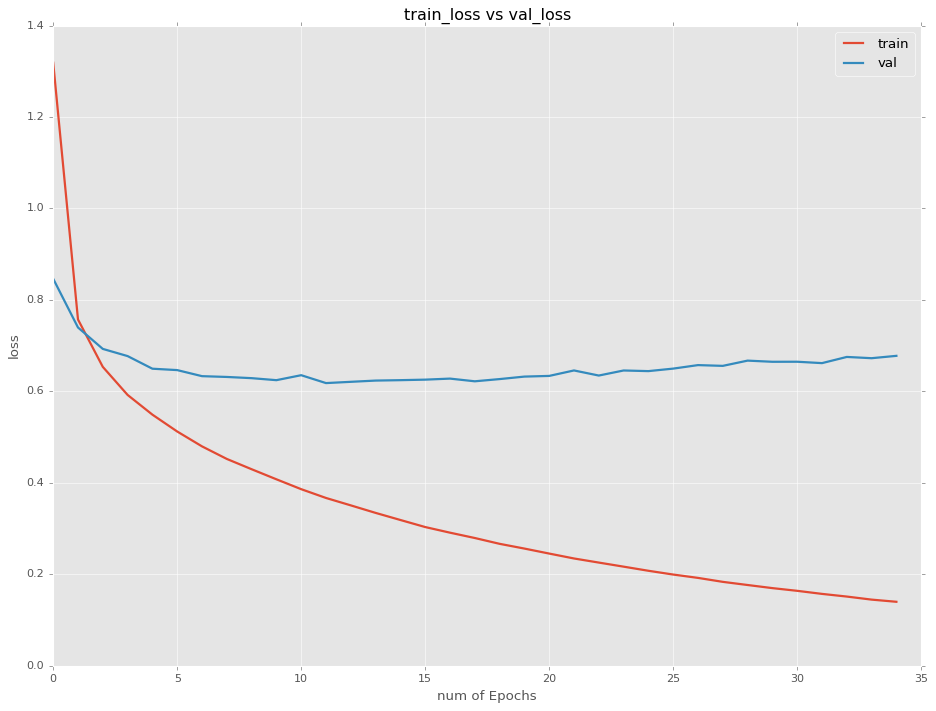

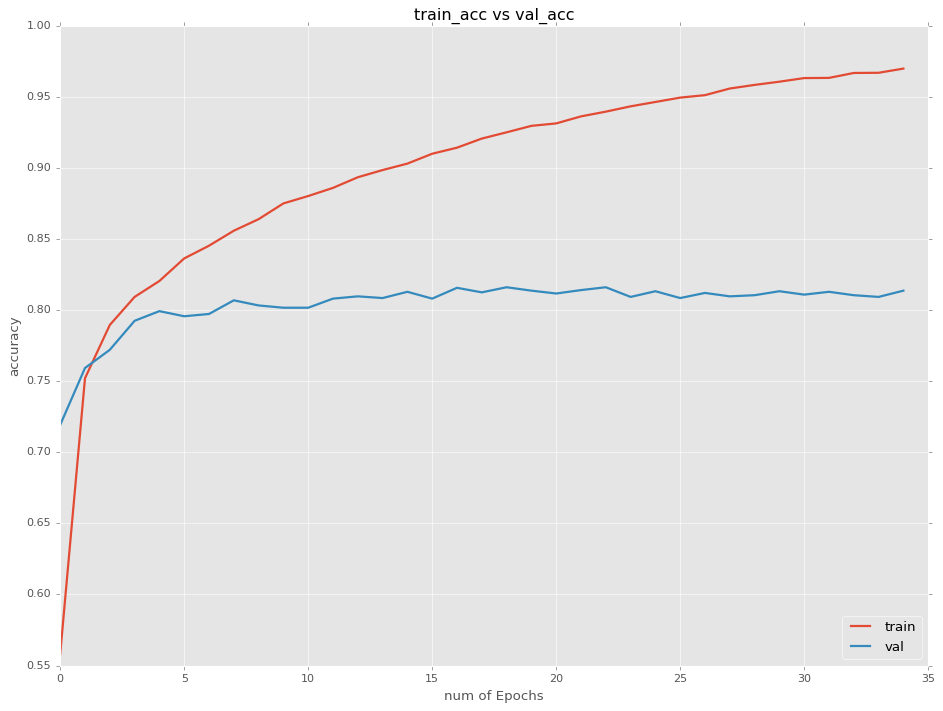

In [23]:
'''
###### The following two lines to download best.hdf5 file from the collaboratory ##########
from google.colab import files
files.download("best.hdf5")
'''

#The Following is the Peformance and History of the Model

import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(35)

plt.figure(1,figsize=(14,10))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['ggplot'])

plt.figure(2,figsize=(14,10))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['ggplot'])


In [26]:
ls

best.hdf5  datalab/  drive/
